# Perkenalan Dataset

Proyek ini menggunakan Medical Cost Personal Datasets yang diambil dari [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance). Dataset ini berisi 1338 baris data kuantitatif, yang memenuhi syarat minimum 500 sampel. Dataset mencakup informasi demografis dan gaya hidup individu, serta biaya medis yang dibebankan oleh asuransi kesehatan.

-- Kolom pada dataset:

- age: Usia

- sex: Jenis kelamin

- bmi: Indeks massa tubuh

- children: Jumlah tanggungan

- smoker: Status merokok

- region: Wilayah tempat tinggal di AS

- charges: Biaya medis individu

Proyek ini didokumentasikan secara lengkap melalui text cell pada notebook dan akan menyelesaikan permasalahan dengan pendekatan machine learning regresi untuk memprediksi biaya medis.

Oleh: Eldy Effendi untuk Submission Machine Learning Terapan Dicoding

# Task
Membuat predictive analysis menggunakan 1 algoritma yaitu regression dan membuat dua permasalahan dan jawab dengan hasil analysis


## Data loading

### Subtask:
Muat dataset "insurance.csv" ke dalam pandas DataFrame.


**Reasoning**:
Muat kumpulan data "insurance.csv" ke dalam pandas DataFrame dan tampilkan beberapa baris pertama dan bentuknya.


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('insurance.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'insurance.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'insurance.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: 'insurance.csv' has parsing errors.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)


## Data exploration

### Subtask:
Jelajahi atau eksplorasi kumpulan data yang dimuat untuk memahami karakteristiknya dan mengidentifikasi potensi masalah.


**Reasoning**:
Menjelajahi atau eksplorasi kumpulan data, termasuk tipe data, nilai yang hilang, distribusi, dan hubungan antar fitur. Ini melibatkan statistik deskriptif, visualisasi, dan pengamatan awal tentang langkah pembersihan data yang potensial.



Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


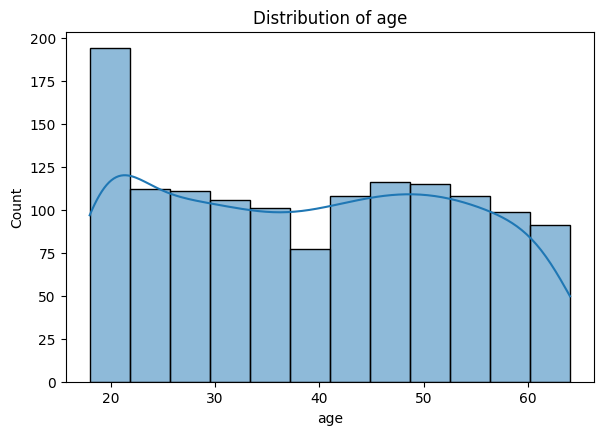

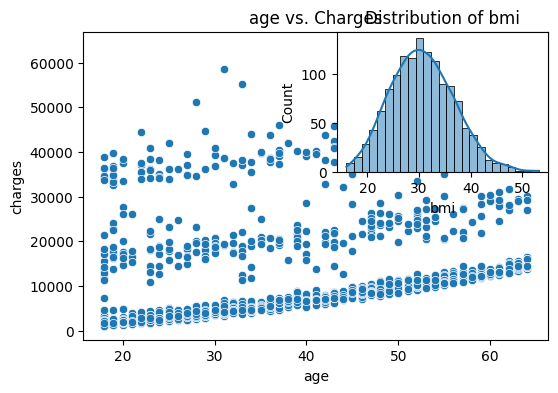

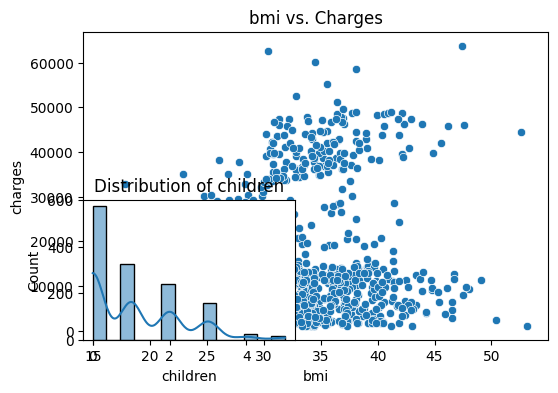

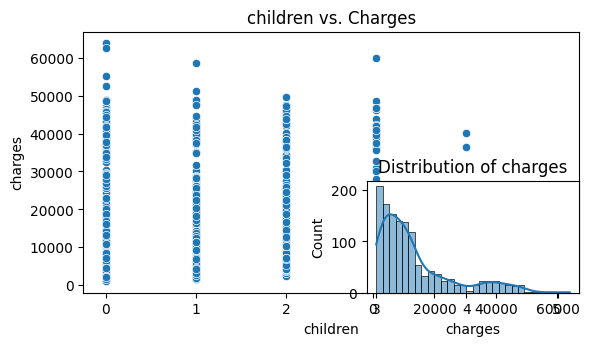


Descriptive Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


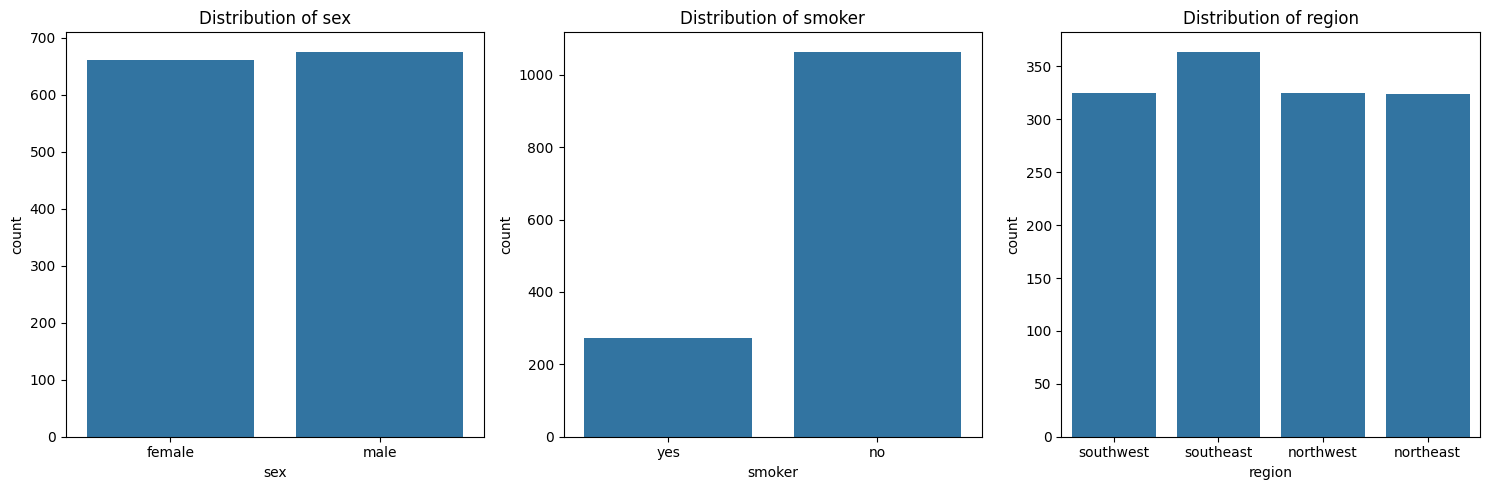

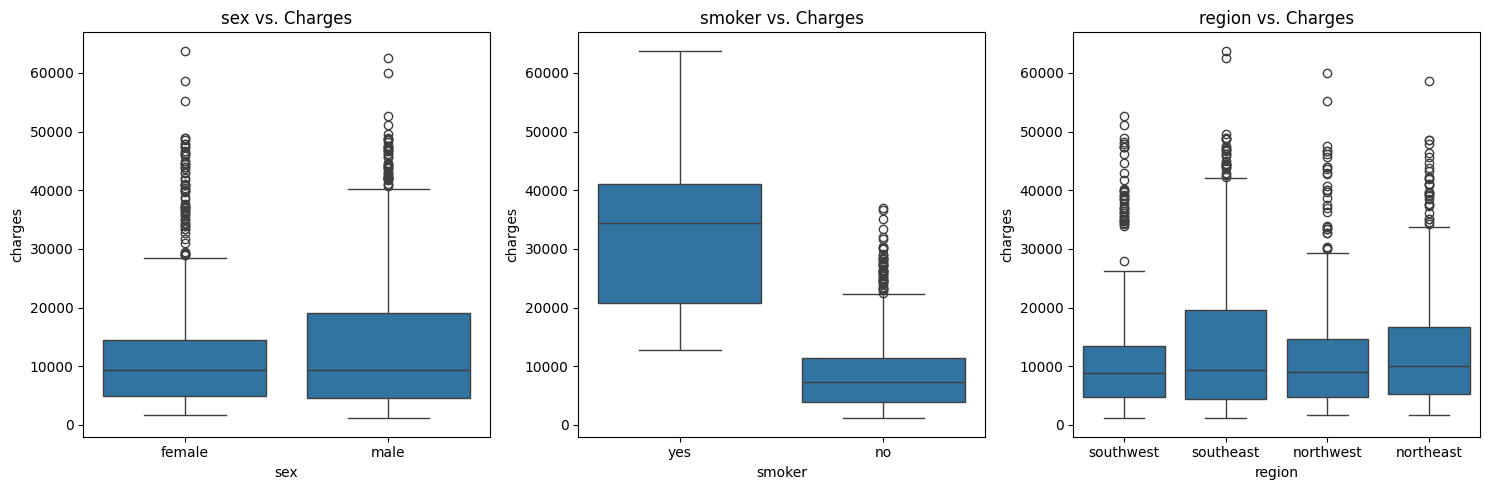


Frequency of sex:
sex
male      676
female    662
Name: count, dtype: int64

Frequency of smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Frequency of region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df.dtypes)

# 2. Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 3 & 4. Analyze numerical features and their relationship with 'charges'
numerical_features = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    if col != 'charges':
      plt.figure(figsize=(6, 4))
      sns.scatterplot(x=col, y='charges', data=df)
      plt.title(f'{col} vs. Charges')

plt.tight_layout()
plt.show()

# Descriptive statistics
print("\nDescriptive Statistics:\n", df[numerical_features].describe())


# 5 & 6. Investigate categorical features and their relationship with 'charges'
categorical_features = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'{col} vs. Charges')
plt.tight_layout()
plt.show()

# Frequency of categories
for col in categorical_features:
  print(f"\nFrequency of {col}:\n{df[col].value_counts()}")

Hasil eksplorasi data :
- Struktur Data:
  - Dataset terdiri dari 1338 baris dan 7 kolom: `age`, `sex`, `bmi`, `children`, `smoker`, `region`, dan `charges`.
  - Tidak ada nilai yang hilang di dalam dataset.

- Distribusi Fitur Numerik:
  - `age`: Mayoritas peserta berusia antara 20 hingga 60 tahun, dengan konsentrasi tertinggi di awal 20-an.
  - `bmi`: Memiliki distribusi mendekati normal dengan sebagian besar nilai berada pada rentang 25–35.
  - `children`: Sebagian besar individu memiliki 0 hingga 2 anak.
  - `charges`: Distribusinya sangat skew ke kanan, menunjukkan adanya individu dengan biaya medis sangat tinggi.

- Hubungan Fitur Numerik dengan `charges`:
  - `age` vs `charges`: Terlihat hubungan positif — makin tua usia, makin tinggi biaya.
  - `bmi` vs `charges`: Tidak terlihat tren jelas secara umum, tetapi individu dengan BMI tinggi cenderung memiliki biaya lebih besar, kemungkinan karena faktor risiko kesehatan.
  - `children` vs `charges`: Tidak terlihat hubungan yang signifikan antara jumlah anak dengan biaya medis.

- Statistik Deskriptif:
  - Rata-rata usia: 39, BMI: 30.66, dan biaya medis: 13.270.
  - Biaya maksimal mencapai lebih dari 63.000, menunjukkan adanya outlier.

- Distribusi Fitur Kategorikal:
  - `sex`: Hampir seimbang antara laki-laki dan perempuan.
  - `smoker`: Mayoritas peserta adalah non-perokok.
  - `region`: Distribusi cukup merata antara Southeast, Southwest, Northwest, dan Northeast.

- Hubungan Fitur Kategorikal dengan `charges`:
  - `smoker`: Perokok memiliki biaya medis yang jauh lebih tinggi dibanding non-perokok.
  - `sex` dan `region`: Tidak terlihat perbedaan biaya yang signifikan.

- Kesimpulan Sementara:
  - Faktor yang paling berpengaruh terhadap biaya medis (`charges`) adalah status `smoker`, diikuti oleh `age` dan `bmi`.
  - Fitur seperti `children`, `sex`, dan `region` tidak menunjukkan pengaruh yang kuat terhadap biaya.


## Data cleaning

### Subtask:
Bersihkan data dengan menangani distribusi variabel 'muatan' yang miring dan berpotensi menangani outlier.


**Reasoning**:
Menerapkan transformasi logaritmik pada kolom 'charges', visualisasikan data yang ditransformasikan, identifikasi dan tangani outlier dalam 'bmi', dan benarkan strategi penanganan outlier yang dipilih.


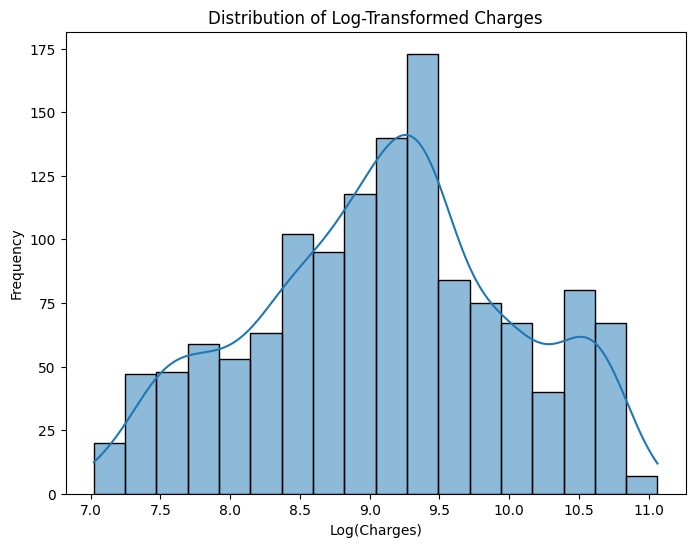

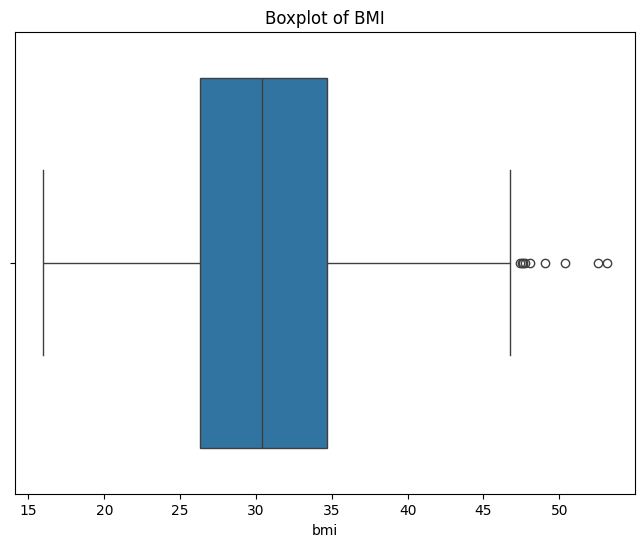

Number of outliers in 'bmi': 9


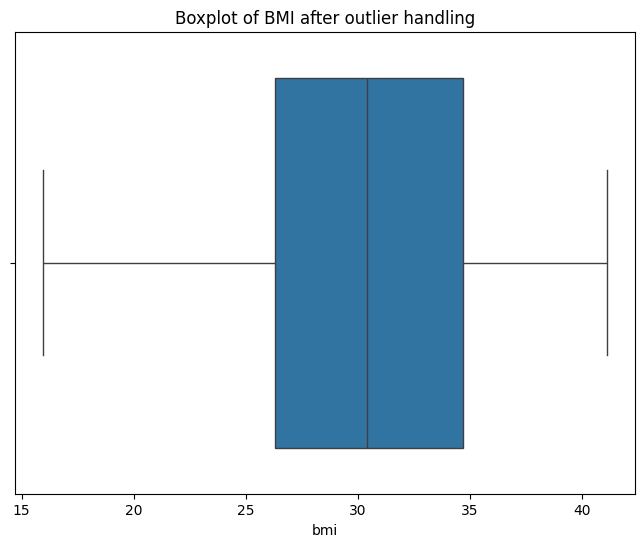

In [ ]:
import numpy as np

# 1. Logarithmic transformation of 'charges'
df['log_charges'] = np.log(df['charges'])

# 2. Visualize the transformed 'log_charges'
plt.figure(figsize=(8, 6))
sns.histplot(df['log_charges'], kde=True)
plt.title('Distribution of Log-Transformed Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.show()

# 3 & 4. Outlier detection and treatment for 'bmi'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

# Calculate IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print(f"Number of outliers in 'bmi': {len(outliers)}")

#Since there are outliers, cap them at the 95th percentile
upper_limit = df['bmi'].quantile(0.95)
df['bmi'] = np.where(df['bmi'] > upper_limit, upper_limit, df['bmi'])

# Visualize the treated 'bmi'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI after outlier handling')
plt.show()

## Feature engineering

### Subtask:
Menyiapkan data untuk pemodelan dengan pengkodean fitur kategoris one-hot dan berpotensi membuat fitur baru.


**Reasoning**:
One-hot mengkodekan fitur kategoris, membuat fitur interaksi, dan memisahkan variabel target dari fitur.



In [ ]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Create interaction feature: age * bmi
df_encoded['age_bmi_interaction'] = df_encoded['age'] * df_encoded['bmi']

# Separate features (X) and target (y)
X = df_encoded.drop('log_charges', axis=1)
y = df_encoded['log_charges']

## Data splitting

### Subtask:
Memisahkan data menjadi set pelatihan dan pengujian.


**Reasoning**:
Memisahkan data ke dalam set pelatihan dan pengujian menggunakan train_test_split, mengelompokkannya berdasarkan kolom 'smoker'.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['smoker'])

## Model training

### Subtask:
Latih model regresi linier pada data pelatihan.


**Reasoning**:
Latih model regresi linier menggunakan data pelatihan.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Mengevaluasi model regresi linier yang terlatih menggunakan metrik yang tepat.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.9003161423608049
Mean Squared Error (MSE): 0.08629443097631509
Root Mean Squared Error (RMSE): 0.29375913768990247


# Prediction and Analysis:

Masalah 1: Berapa perkiraan biaya asuransi untuk pria berusia 30 tahun, bukan perokok, dengan BMI 25, 1 anak, dan tinggal di wilayah tenggara?

In [ ]:
# Gunakan struktur fitur dari model training
features = X_train.columns

# Buat dictionary dengan default 0 untuk semua fitur
input_data = {col: 0 for col in features}

# Isi nilai-nilai sesuai kasus
input_data['age'] = 30
input_data['bmi'] = 25
input_data['children'] = 1
input_data['sex_male'] = 1  # Male
input_data['smoker_yes'] = 0  # Non-smoker
input_data['region_southeast'] = 1  # Southeast region
input_data['age_bmi_interaction'] = 30 * 25  # interaction term

# Konversi ke DataFrame
new_data = pd.DataFrame([input_data])

# Prediksi log charges
predicted_log_charges = model.predict(new_data)

# Ubah ke skala asli
predicted_charges = np.exp(predicted_log_charges)

print(f"✅ Predicted insurance cost: ${predicted_charges[0]:.2f}")


✅ Predicted insurance cost: $3191.19


Masalah 2: Bagaimana status merokok memengaruhi perkiraan biaya asuransi, dengan asumsi faktor lain konstan?

In [ ]:
# Salin data dan ubah status perokok
smoker_data = new_data.copy()
smoker_data['smoker_yes'] = 1  # Smoker

non_smoker_data = new_data.copy()
non_smoker_data['smoker_yes'] = 0  # Non-smoker

# Prediksi
log_charge_smoker = model.predict(smoker_data)
log_charge_non_smoker = model.predict(non_smoker_data)

# Kembali ke skala asli
charge_smoker = np.exp(log_charge_smoker)[0]
charge_non_smoker = np.exp(log_charge_non_smoker)[0]

# Selisih biaya
difference = charge_smoker - charge_non_smoker

print(f"✅ Predicted cost for smoker: ${charge_smoker:.2f}")
print(f"✅ Predicted cost for non-smoker: ${charge_non_smoker:.2f}")
print(f"📊 Difference in cost due to smoking: ${difference:.2f}")


✅ Predicted cost for smoker: $4304.62
✅ Predicted cost for non-smoker: $3191.19
📊 Difference in cost due to smoking: $1113.43


# Hasil dan Kesimpulan

- **Masalah 1: Perkiraan Biaya Asuransi untuk Individu Tertentu**
  - Kasus yang dianalisis: Pria berusia 30 tahun, bukan perokok, memiliki BMI 25, satu anak, dan tinggal di wilayah tenggara (southeast).
  - Fitur input disusun sesuai struktur model pelatihan, termasuk fitur interaksi `age_bmi_interaction`.
  - Setelah dilakukan prediksi menggunakan model regresi log, hasil dikonversi kembali ke skala asli menggunakan eksponensial.
  - ✅ **Perkiraan biaya asuransi:** **$3191.19**

- **Masalah 2: Pengaruh Status Merokok terhadap Biaya Asuransi**
  - Dilakukan perbandingan antara dua skenario:
    - Individu perokok (`smoker_yes = 1`)
    - Individu non-perokok (`smoker_yes = 0`)
  - Faktor lain seperti usia, jenis kelamin, BMI, anak, dan wilayah diasumsikan tetap sama.
  - Hasil prediksi menunjukkan:
    - ✅ **Perkiraan biaya untuk perokok:** **$4304.62**
    - ✅ **Perkiraan biaya untuk non-perokok:** **$3191.19**
    - 📊 **Selisih biaya akibat merokok:** **$1113.43**
  - Kesimpulan: Status merokok memiliki dampak signifikan terhadap kenaikan biaya asuransi meskipun faktor lain tetap.